#**Predicting Heart Disease with K-Nearest Neighbors**


---

In this notebook we will analyze the Cleveland Heart Disease data from the [UC Irvine Heart Disease Dataset](https://archive.ics.uci.edu/dataset/45/heart+disease). We will use the **K-Nearest Neighbors** algorithm to predict whether a person is likely to have heart disease based on clinical and demographic factors.


#### **Objective:**
To build a KNN classifier that can accurately predict the presence of heart disease (binary target: 0 = no disease, 1 = disease).



#### **Dataset Overview:**
- Source: UC Irvine Heart Disease Dataset  
- Total Records: 303  
- Features: 13 attributes + target  
- Target: `target` (0 = no heart disease, 1–4 = presence of heart disease)

---







#### **1. Importing libraries and loading the dataset:**

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Loading the dataset:

In [58]:
import os
os.listdir('/content')

['.config',
 'cleveland.data',
 'heart+disease.zip',
 'processed.cleveland.data',
 'cleve.mod',
 'hungarian.data',
 'heart-disease.names',
 'long-beach-va.data',
 'reprocessed.hungarian.data',
 'switzerland.data',
 'Index',
 'processed.switzerland.data',
 'bak',
 'new.data',
 'costs',
 'ask-detrano',
 'processed.hungarian.data',
 'processed.va.data',
 'WARNING',
 'sample_data']

In [59]:
df = pd.read_csv('processed.cleveland.data', header=None)
df.head()

0    1    2      3      4    5    6      7    8    9    10   11   12  13
0  63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   0
1  67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   2
2  67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   1
3  37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   0
4  41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   0

Since the datframe have no headers, we will assign the column names from the dataset documentation:

In [60]:
column_names = [
    "age",              # age in years
    "sex",              # sex (1 = male; 0 = female)
    "cp",               # chest pain type (1–4)
    "trestbps",         # resting blood pressure (mm Hg)
    "chol",             # serum cholesterol (mg/dl)
    "fbs",              # fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
    "restecg",          # resting electrocardiographic results (0–2)
    "thalach",          # maximum heart rate achieved
    "exang",            # exercise induced angina (1 = yes; 0 = no)
    "oldpeak",          # ST depression induced by exercise
    "slope",            # slope of the peak exercise ST segment (1–3)
    "ca",               # number of major vessels (0–3) colored by fluoroscopy
    "thal",             # thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect)
    "target"            # 0 = no heart disease, 1–4 = heart disease
]

df.columns = column_names
df.head()

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [62]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope      target  
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.937294  
std      0.994971   22.875003    0.469794    1.161075    0.616226    1.228536  
min      0.000000   71.000000    0.000000    0.000000    1.000000    0.000000  
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000  
50%      1.000000  153.000000    0.000000    0.800000    2.000000    0.000000  
75%      2.000000  166.000000    1.000000    1.600000    2.000000    2.000000  
max      2.000000  202.000000    1.000000    6.200000    3.000000    4.000000

In [63]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

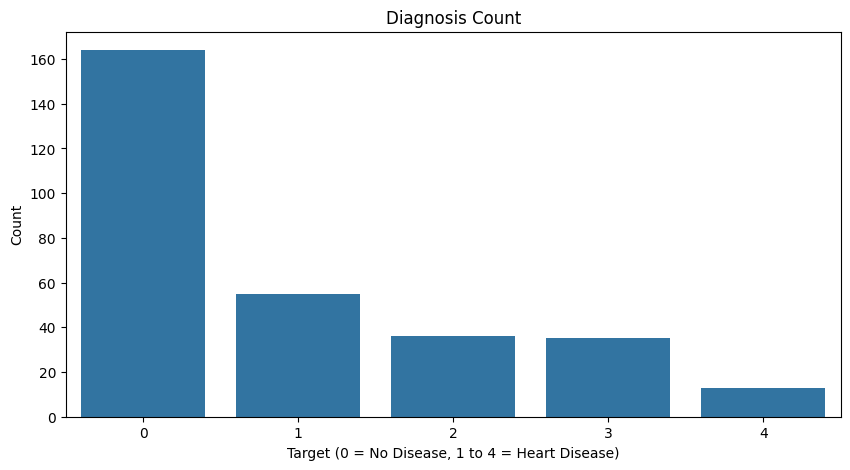

In [64]:
df['target']

fig = plt.figure(figsize = (10,5))

sns.countplot(x='target', data=df)
plt.title('Diagnosis Count')
plt.xlabel('Target (0 = No Disease, 1 to 4 = Heart Disease)')
plt.ylabel('Count')
plt.show()

####**Exploratory Data Analysis**
---

After inspection we see that the data has been pre-cleaned so we are ready to perform some EDA. We begin by setting all values of `target` greater than 0 to 1.


In [65]:
df_binary = df.copy()
df_binary['target'] = df_binary['target'].transform(lambda x: 0 if x == 0 else 1)

df_binary.head()

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       1  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0

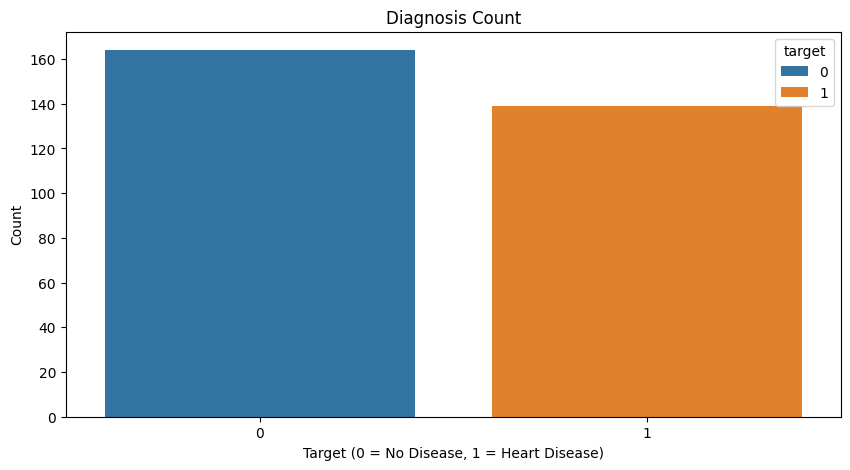

target
0    164
1    139
Name: count, dtype: int64


In [66]:
fig = plt.figure(figsize=(10, 5))

sns.countplot(x='target', data = df_binary, hue='target')
plt.title('Diagnosis Count')
plt.xlabel('Target (0 = No Disease, 1 = Heart Disease)')
plt.ylabel('Count')
plt.show()

print(df_binary['target'].value_counts())

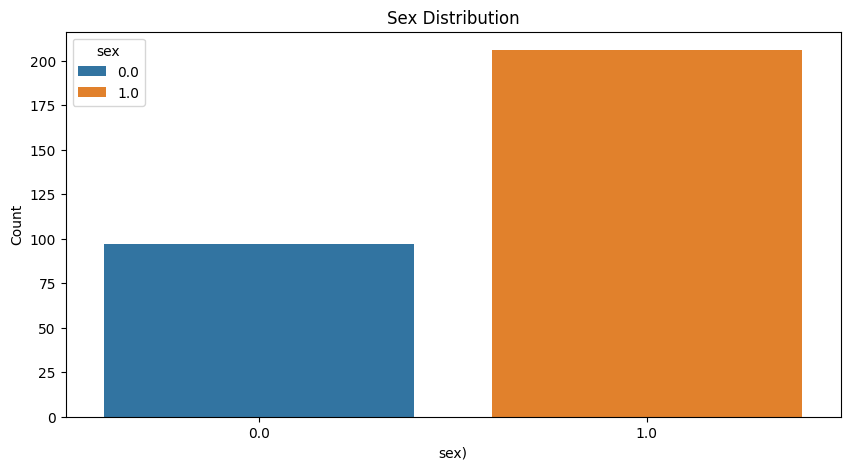

sex
1.0    206
0.0     97
Name: count, dtype: int64


In [67]:
fig = plt.figure(figsize=(10, 5))

sns.countplot(x='sex', data = df_binary, hue='sex')
plt.title('Sex Distribution')
plt.xlabel('sex)')
plt.ylabel('Count')
plt.show()

print(df_binary['sex'].value_counts())

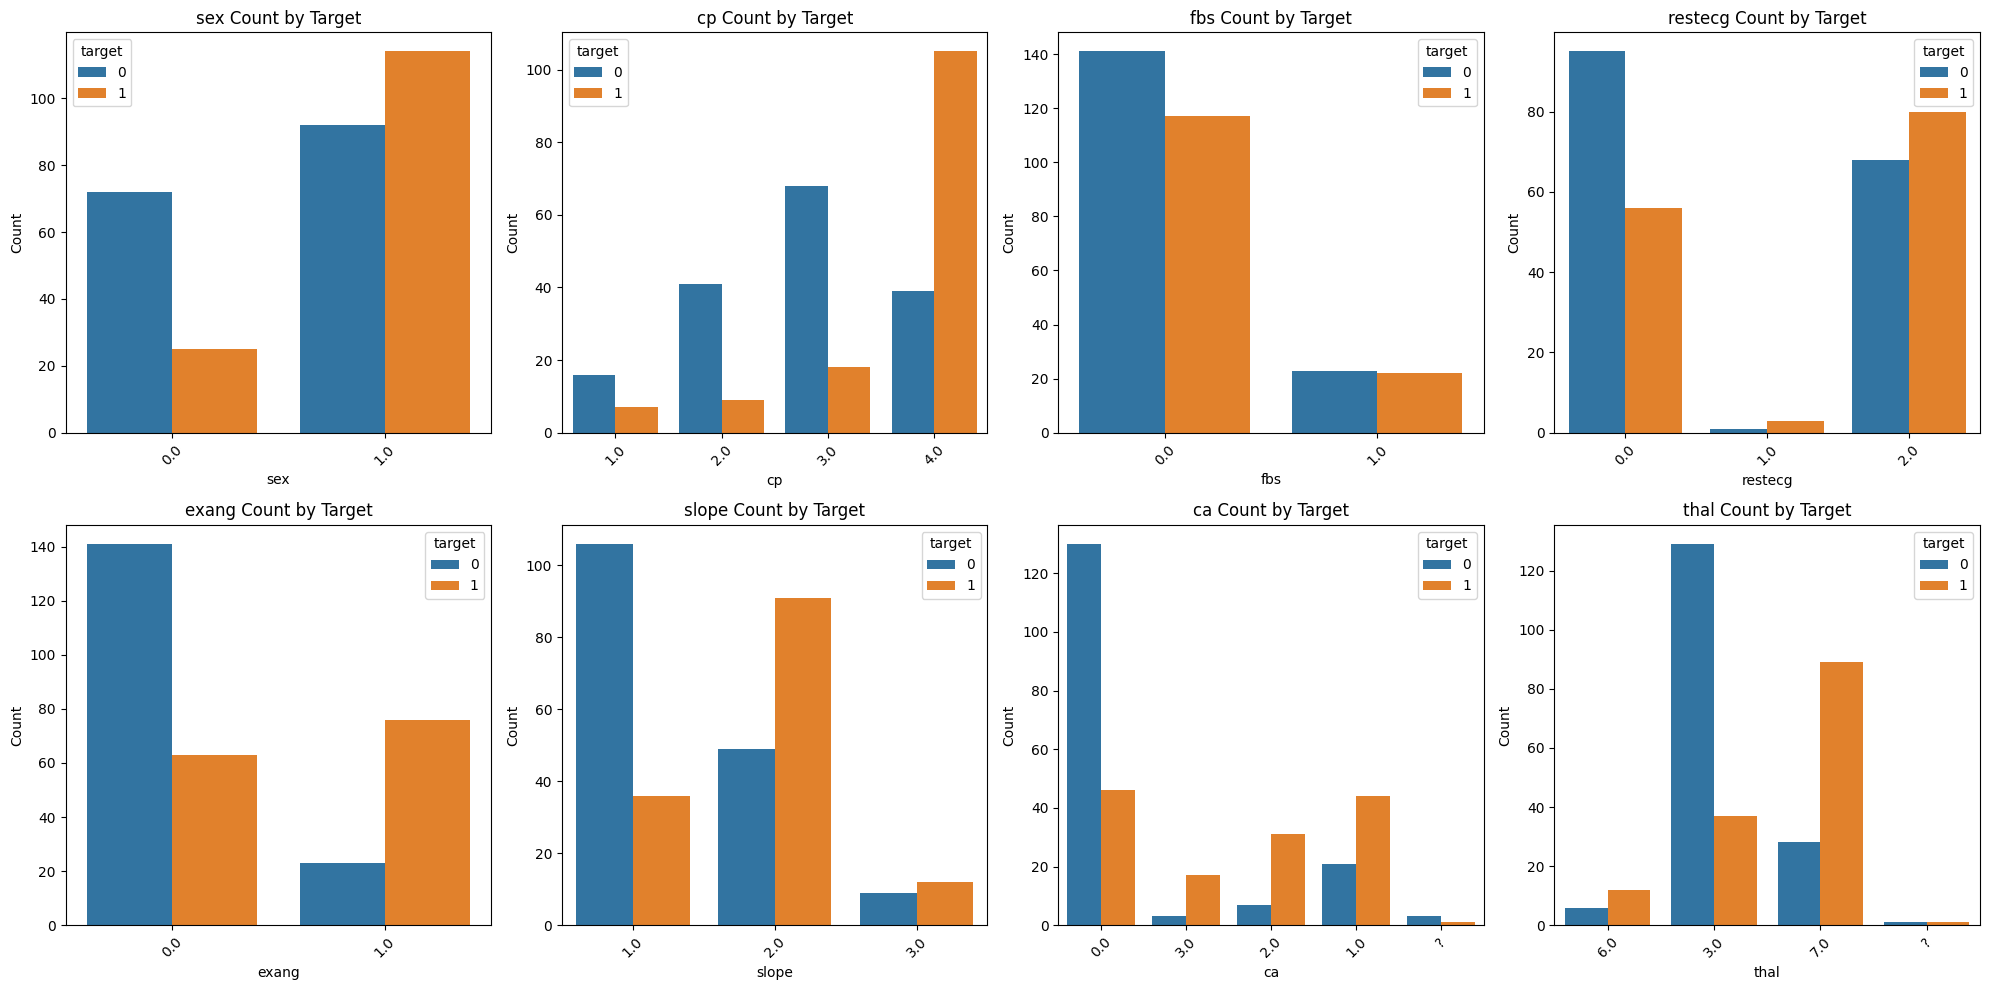

In [68]:
exclude_cols = ["target", "age", "trestbps", "chol", "thalach", "oldpeak"]
cols_to_plot = [col for col in df_binary.columns if col not in exclude_cols]

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, column in enumerate(cols_to_plot):
    sns.countplot(x=column, data=df_binary, hue='target', ax=axes[i])
    axes[i].set_title(f"{column} Count by Target")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

age, trestbp, chol, thalach, oldpeak

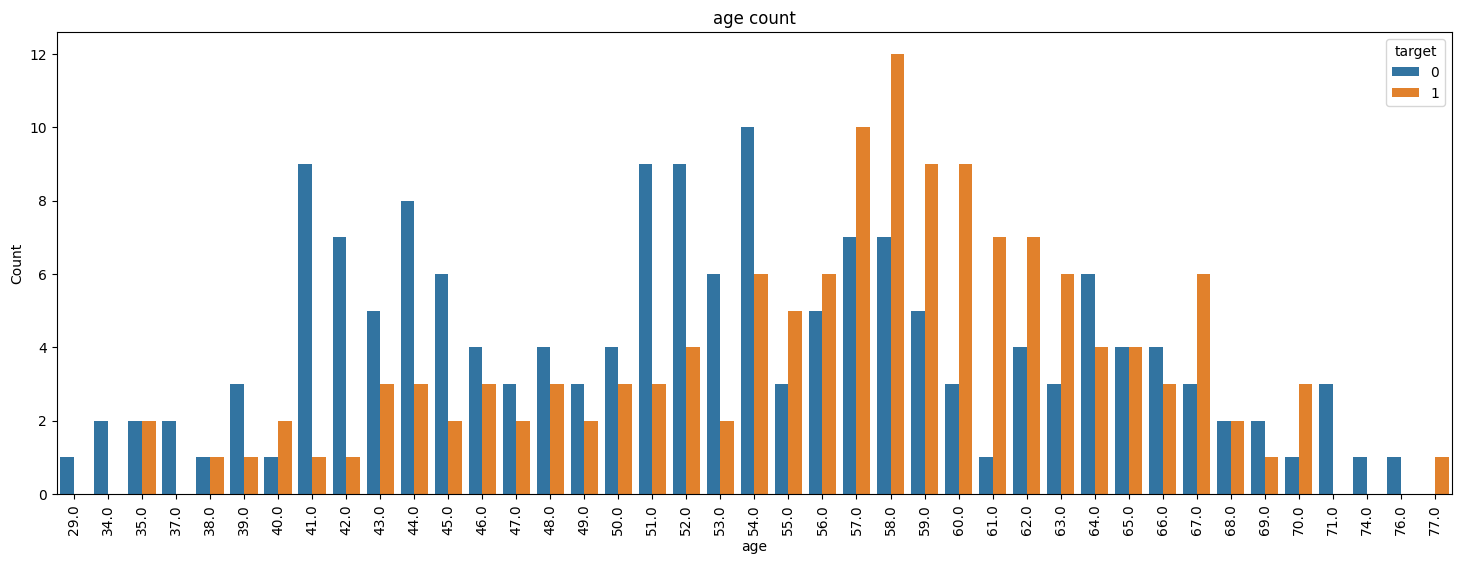

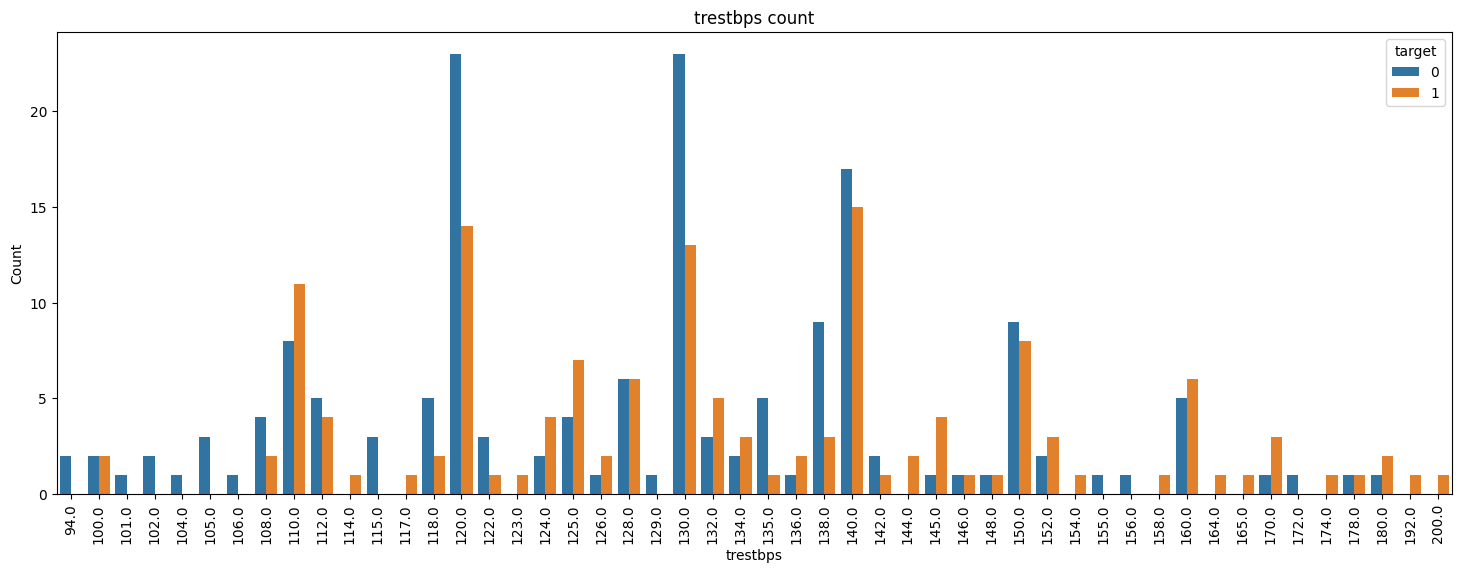

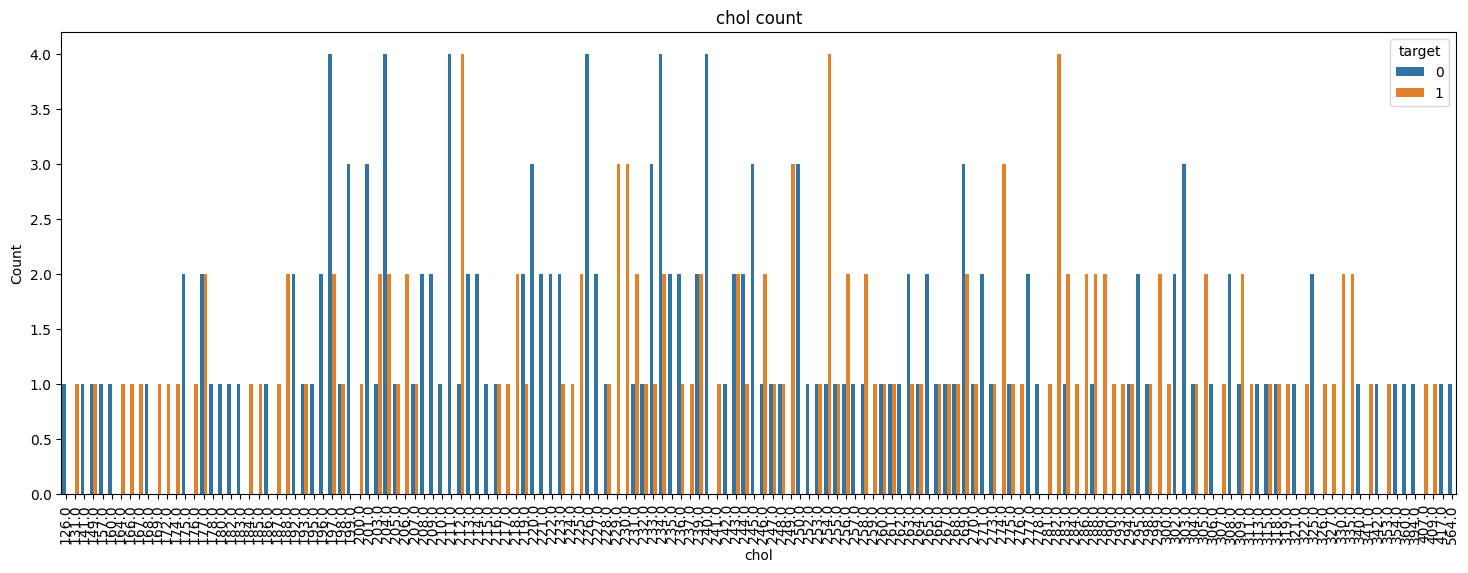

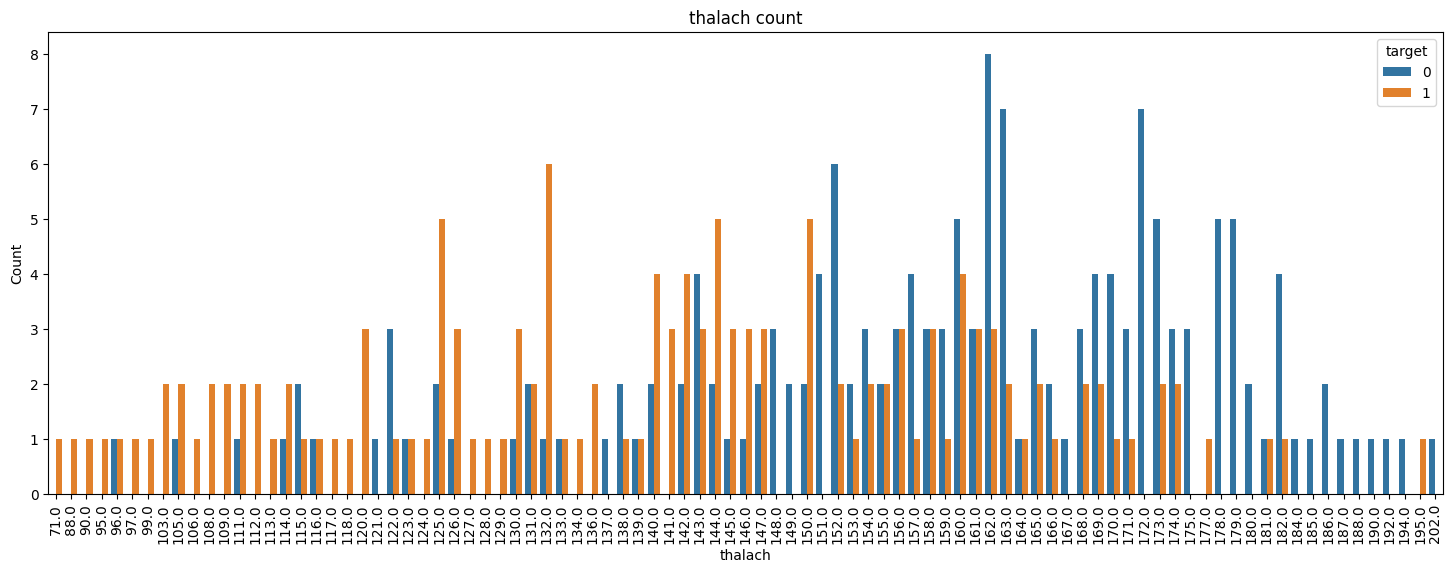

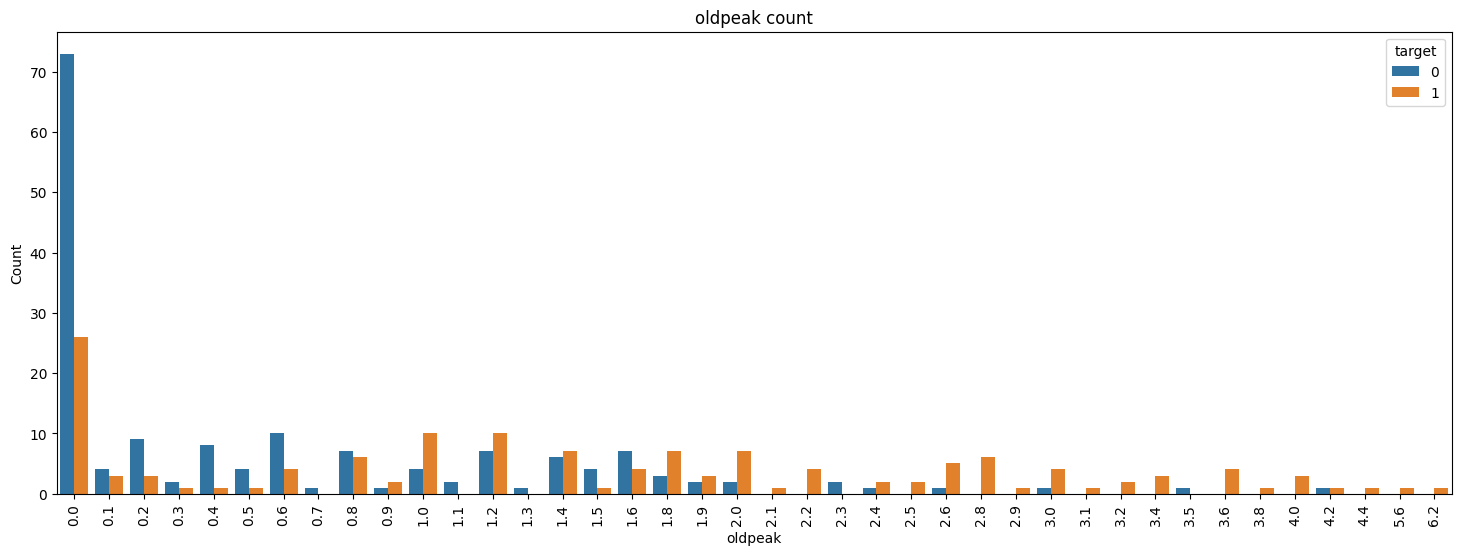

In [69]:
columns = ["age", "trestbps", "chol", "thalach", "oldpeak"]
for column in columns:
  fig = plt.figure(figsize=(18, 6))
  sns.countplot(x=column, data=df_binary, hue='target')
  plt.title(column+' count')
  plt.xlabel(column)
  plt.xticks(rotation=90)
  plt.ylabel('Count')
  plt.show()

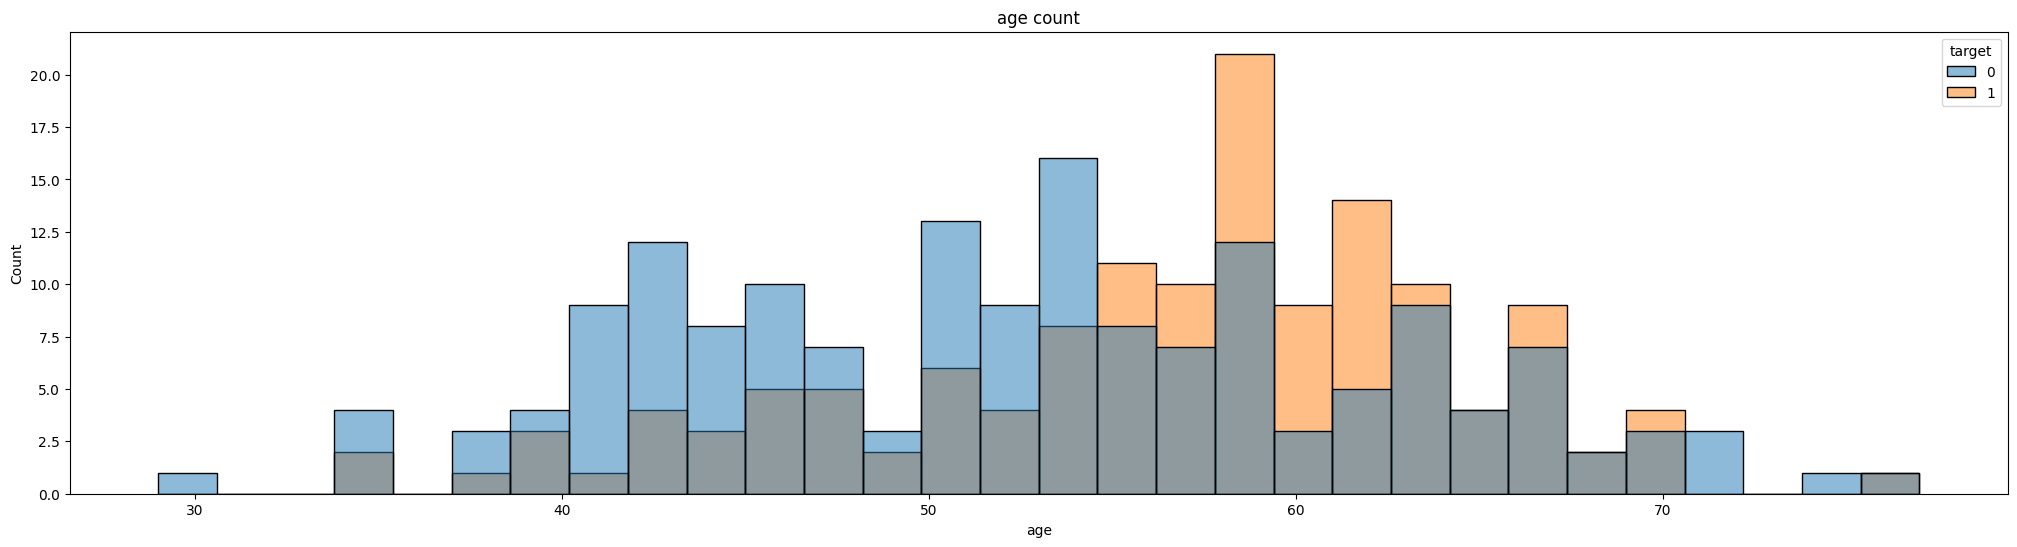

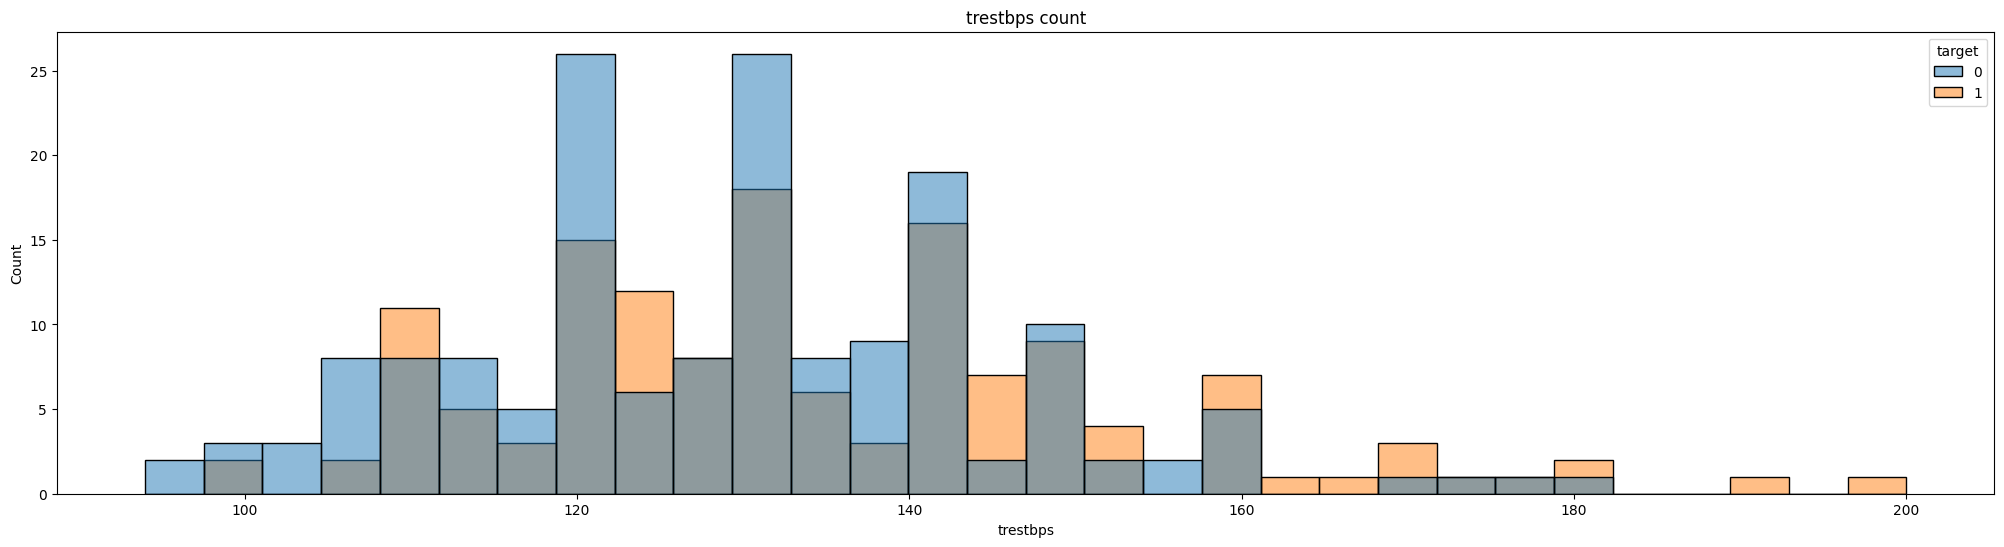

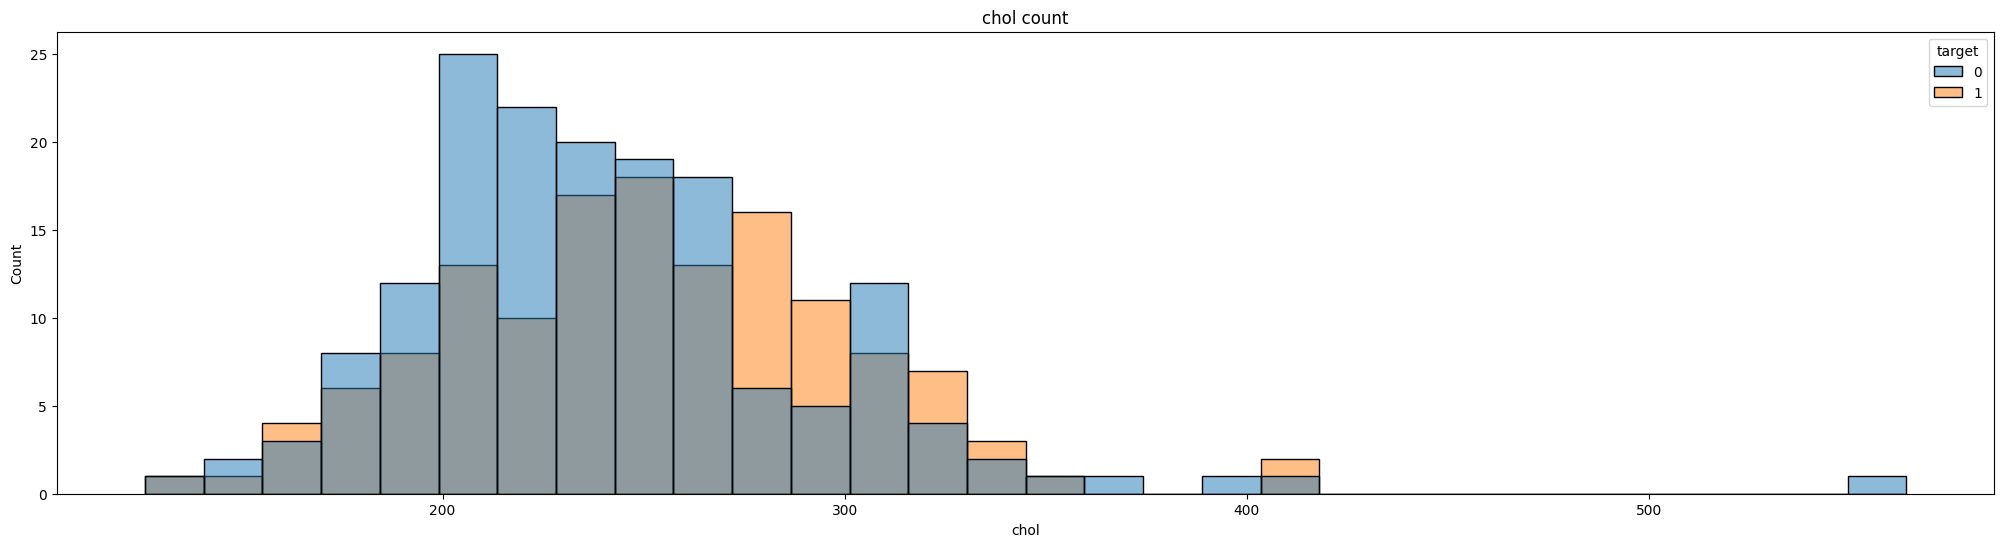

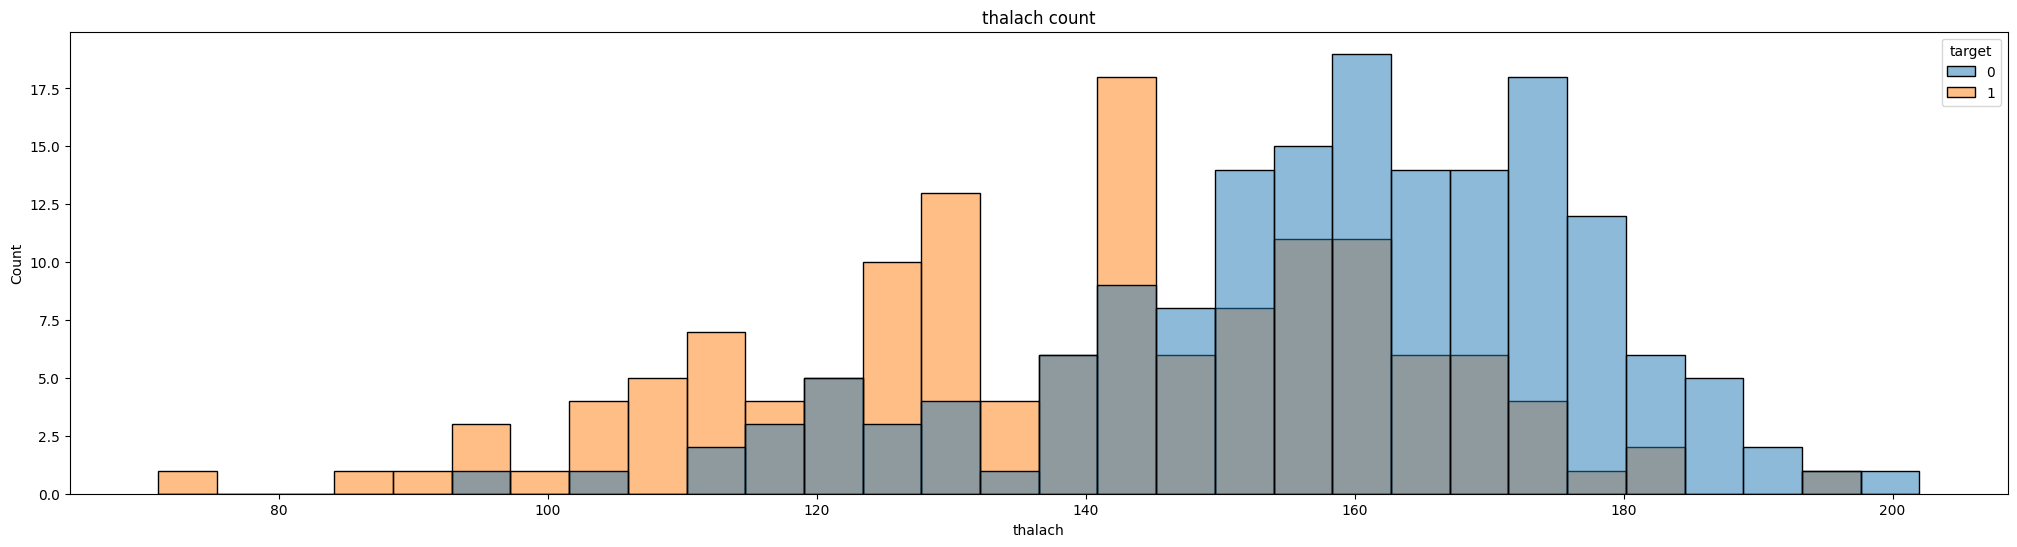

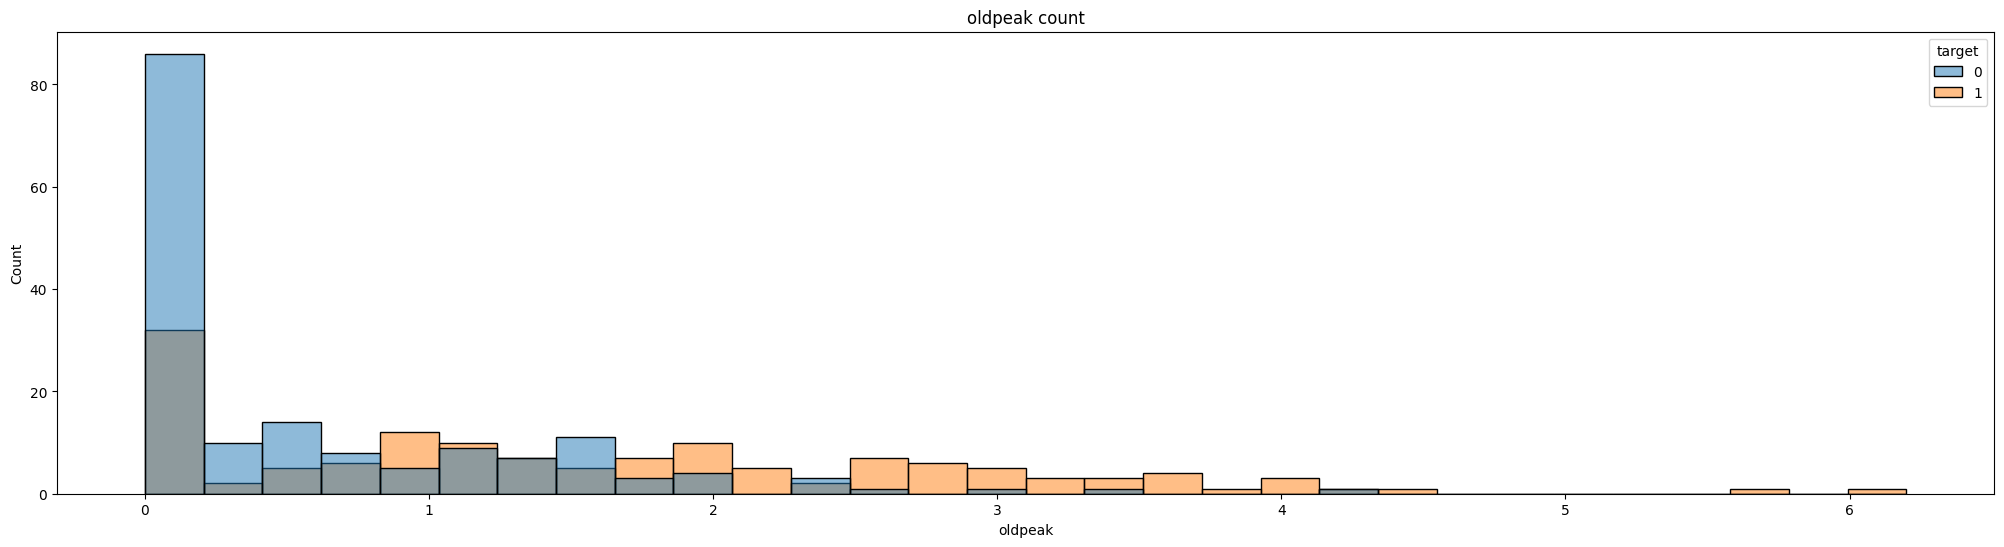

In [70]:
columns = ["age", "trestbps", "chol", "thalach", "oldpeak"]
for column in columns:
  fig = plt.figure(figsize=(25, 6))
  sns.histplot(x=column, data=df_binary, hue='target', bins=30)
  plt.title(column+' count')
  plt.xlabel(column)
  plt.ylabel('Count')
  plt.show()